<a href="https://colab.research.google.com/github/lutakrystal305/torch_tutorial/blob/main/Torch_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/nttuan8/Pytorch_tutorial.git

Cloning into 'Pytorch_tutorial'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 38 (delta 8), reused 29 (delta 5), pack-reused 0
Unpacking objects: 100% (38/38), done.


In [ ]:
!mv "/content/Pytorch_tutorial/L2/data_linear.csv" "/content/"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
data = pd.read_csv('data_linear.csv').values

In [ ]:
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
print('shape x: ', x.shape)
print('shape y: ', y.shape)
x = x.unsqueeze(1)
y = y.unsqueeze(1)
print(x.shape, y.shape)

shape x:  torch.Size([30])
shape y:  torch.Size([30])
torch.Size([30, 1]) torch.Size([30, 1])


In [ ]:
def training(epochs, optimizer, model, loss_fn, x, y):
    losses = []
    for epoch in range(1, epochs+1):
        y_hat = model(x)
        print('shape y^: ', y_hat.shape, '#y shape: ', y.shape)
        loss = loss_fn(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 1 == 0:
            losses.append(loss.item())
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return losses

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=0.00004)

In [ ]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[0.3185]], requires_grad=True), Parameter containing:
 tensor([-0.5500], requires_grad=True)]

In [ ]:
loss= training(10, optimizer, linear_model, nn.MSELoss(), x, y)

shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 1, Loss 158099.781250
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 2, Loss 62307.417969
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 3, Loss 24647.699219
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 4, Loss 9842.200195
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 5, Loss 4021.579834
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 6, Loss 1733.268433
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 7, Loss 833.647461
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 8, Loss 479.968170
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 9, Loss 340.923920
shape y^:  torch.Size([30, 1]) #y shape:  torch.Size([30, 1])
Epoch 10, Loss 286.260162


Text(0, 0.5, 'loss')

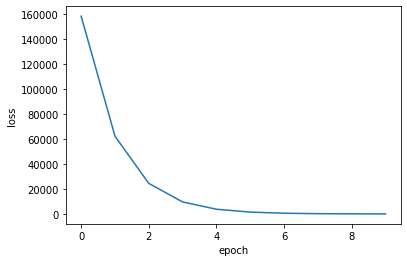

In [ ]:

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')

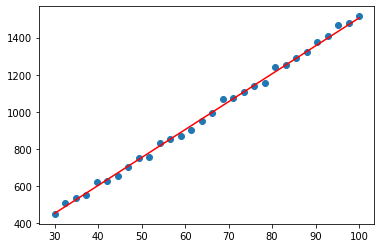

In [ ]:
# chuyển dữ liệu về dạng torch
x = torch.tensor(data[:,0], dtype=torch.float32)
y = torch.tensor(data[:,1], dtype=torch.float32)
x = x.unsqueeze(1)

with torch.no_grad():
    y_hat = linear_model(x)
plt.scatter(x, y)
plt.plot(x, y_hat, c='r')